# Sales Analytics Project: Sales Data Exploration

## Overview
This notebook presents an exploratory data analysis (EDA) of corporate course sales, focusing on **Sales Analytics**.  
The goal is to demonstrate data analysis skills applied to commercial and marketing performance metrics, preparing the project for **portfolio and GitHub**.

## Notebook Objectives
- Load and explore the sales dataset (`sales_data.csv`)
- Understand the data structure: types, columns, and missing values
- Obtain initial descriptive statistics
- Prepare the ground for advanced **Sales Ops** and marketing performance analyses

## Dataset
The dataset contains sales and marketing metrics, including:  
- `date`: date of sale  
- `product`: course name  
- `units_sold`: units sold  
- `unit_price`: price per unit  
- `revenue`: revenue generated  
- `leads`, `mql`, `sql`, `opportunities`: sales funnel metrics  
- `conversion_rate`: funnel conversion rate  
- `cpl`: cost per lead  
- `marketing_spend`: marketing spend  
- `cac`: customer acquisition cost

## Project Importance
This analysis is relevant to:  
- Identify opportunities to improve the sales funnel  
- Evaluate the impact of marketing actions  
- Obtain actionable insights for **Sales Ops, Revenue Analytics, and Customer Success**  
- Demonstrate the ability to turn raw data into strategic business decisions


In [8]:
# Import libraries and load dataset
import pandas as pd

sales_data = pd.read_csv('../data/raw/sales_data.csv')

# Quick look at the first rows
sales_data.head()


,date,product,units_sold,unit_price,revenue,leads,mql,sql,opportunities,conversion_rate,cpl,marketing_spend,cac
0,2024-01-01,Leadership Mastery,71,1500,106500,470,220,127,44,1.6136,11.43,5372.98,75.68
1,2024-01-01,High-Performance Communication,94,2500,235000,287,100,44,21,4.4762,9.24,2652.18,28.21
2,2024-01-01,Strategic Thinking,107,3000,321000,613,192,87,30,3.5667,14.69,9007.01,84.18
3,2024-01-01,Executive Presence,41,1500,61500,947,243,135,56,0.7321,9.03,8548.23,208.49
4,2024-01-01,Negotiation for Executives,79,3000,237000,982,379,240,86,0.9186,19.31,18965.52,240.07


In [9]:
# Check number of rows and columns
sales_data.shape

(60, 13)

In [10]:
# Check columns and data types
sales_data.dtypes

date                object
product             object
units_sold           int64
unit_price           int64
revenue              int64
leads                int64
mql                  int64
sql                  int64
opportunities        int64
conversion_rate    float64
cpl                float64
marketing_spend    float64
cac                float64
dtype: object

In [11]:
# Check for missing values
sales_data.isnull().sum()

date               0
product            0
units_sold         0
unit_price         0
revenue            0
leads              0
mql                0
sql                0
opportunities      0
conversion_rate    0
cpl                0
marketing_spend    0
cac                0
dtype: int64

In [12]:
# Descriptive statistics for numeric columns
sales_data.describe()

,units_sold,unit_price,revenue,leads,mql,sql,opportunities,conversion_rate,cpl,marketing_spend,cac
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,65.716667,2258.333333,148691.666667,688.466667,275.666667,149.050000,66.016667,1.395325,18.698000,12958.179500,254.397500
std,28.225539,592.979168,79068.308361,286.574951,124.505621,72.979083,36.688562,1.197612,6.224641,7121.200904,227.561013
min,20.000000,1500.000000,40500.000000,201.000000,60.000000,31.000000,11.000000,0.301700,8.290000,2652.180000,28.210000
25%,42.750000,1500.000000,91500.000000,400.750000,176.250000,93.750000,38.750000,0.581150,13.610000,6051.480000,89.742500
50%,66.000000,2000.000000,127000.000000,722.000000,246.000000,136.000000,56.500000,0.922550,19.275000,11863.625000,219.645000
75%,83.000000,3000.000000,191875.000000,893.500000,384.250000,205.250000,86.250000,1.884225,23.540000,19002.877500,323.137500
max,118.000000,3000.000000,354000.000000,1180.000000,604.000000,313.000000,171.000000,6.750000,29.410000,33934.790000,1429.500000


## Initial Insights from Sales Data

- **Dataset size:** 60 rows × 13 columns  
- **No missing values** — all data is complete, which is ideal for analysis  
- **Data types:**  
  - Dates and product names are objects (strings)  
  - Metrics like units_sold, revenue, leads, SQL, opportunities, etc. are numeric  

### Key Observations from Descriptive Statistics

- **Revenue:**  
  - Average: ~148k  
  - Min: 40k, Max: 354k → large variation between products and campaigns  

- **Units Sold:**  
  - Average: 66 units  
  - Min: 20, Max: 118 → shows different product performance  

- **Marketing Metrics:**  
  - Conversion rate ranges from 0.3% to 6.75%  
  - Cost per lead (CPL) varies between 8.3 and 29.4  
  - Marketing spend ranges from ~2.6k to 33.9k  

- **Sales Metrics:**  
  - Leads → MQL → SQL → Opportunities pipeline is clearly captured  
  - CAC ranges from 28 to 1429, showing some campaigns are more efficient than others  

### Next Steps

- Convert `date` column to datetime for time-series analysis  
- Start visualizing trends over time and by product  
- Explore correlations between marketing spend, leads, conversion rate, and revenue  

In [13]:
# Convert 'date' column to datetime
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Create additional columns for analysis
sales_data['year'] = sales_data['date'].dt.year
sales_data['month'] = sales_data['date'].dt.month
sales_data['month_name'] = sales_data['date'].dt.strftime('%B')

# Check the updated dataset
sales_data.head()

,date,product,units_sold,unit_price,revenue,leads,mql,sql,opportunities,conversion_rate,cpl,marketing_spend,cac,year,month,month_name
0,2024-01-01,Leadership Mastery,71,1500,106500,470,220,127,44,1.6136,11.43,5372.98,75.68,2024,1,January
1,2024-01-01,High-Performance Communication,94,2500,235000,287,100,44,21,4.4762,9.24,2652.18,28.21,2024,1,January
2,2024-01-01,Strategic Thinking,107,3000,321000,613,192,87,30,3.5667,14.69,9007.01,84.18,2024,1,January
3,2024-01-01,Executive Presence,41,1500,61500,947,243,135,56,0.7321,9.03,8548.23,208.49,2024,1,January
4,2024-01-01,Negotiation for Executives,79,3000,237000,982,379,240,86,0.9186,19.31,18965.52,240.07,2024,1,January


## Initial Visual Analysis

We start exploring key metrics from the sales data to understand trends over time and product performance.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

### 1️: Revenue per Month
Shows total revenue generated each month to identify trends and seasonality.

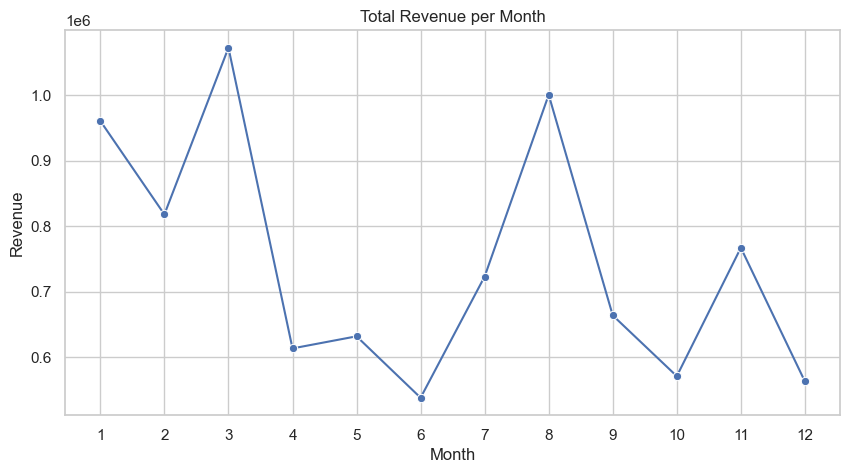

In [18]:
monthly_revenue = sales_data.groupby('month')['revenue'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_revenue, x='month', y='revenue', marker='o')
plt.title('Total Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(range(1,13))
plt.show()

### 2️: Units Sold per Product
Highlights the best-selling products and overall demand.

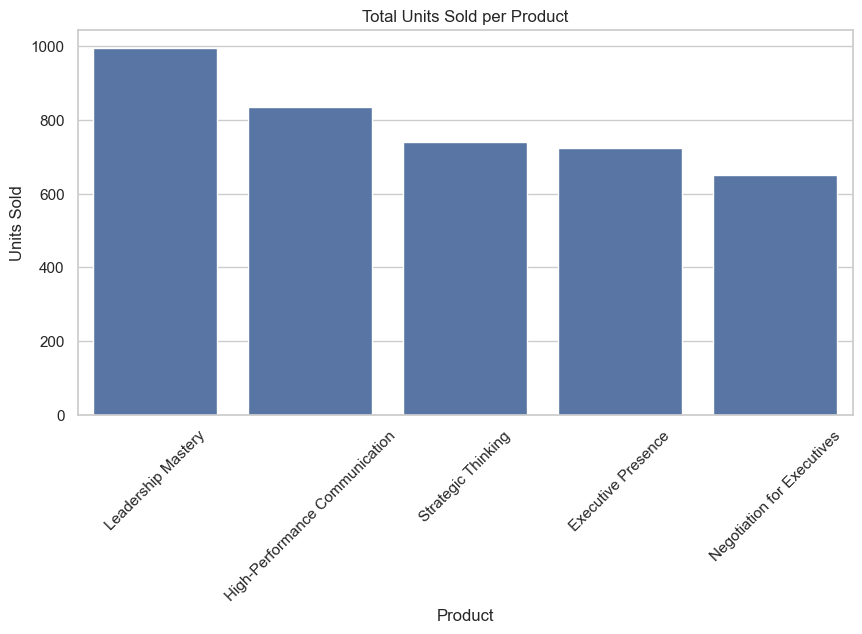

In [19]:
plt.figure(figsize=(10,5))
product_units = sales_data.groupby('product')['units_sold'].sum().sort_values(ascending=False)
sns.barplot(x=product_units.index, y=product_units.values)
plt.title('Total Units Sold per Product')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

### 3️: Average Conversion Rate per Product
Shows how efficiently leads are converted into opportunities by product.

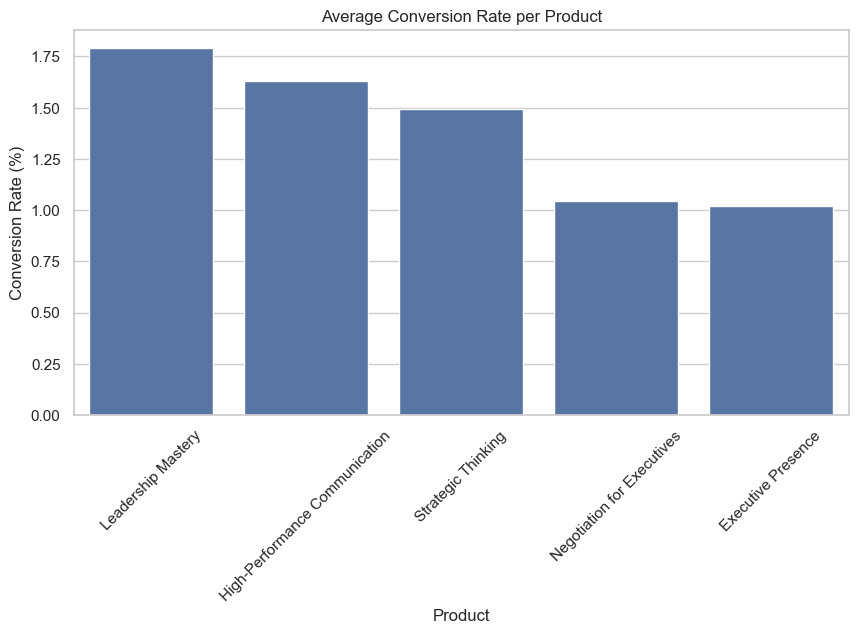

In [20]:
plt.figure(figsize=(10,5))
product_conversion = sales_data.groupby('product')['conversion_rate'].mean().sort_values(ascending=False)
sns.barplot(x=product_conversion.index, y=product_conversion.values)
plt.title('Average Conversion Rate per Product')
plt.xlabel('Product')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.show()

## Correlation Analysis

We explore relationships between marketing spend, leads, conversion rate, and revenue.  
This helps identify which investments are most effective and informs strategic decisions.

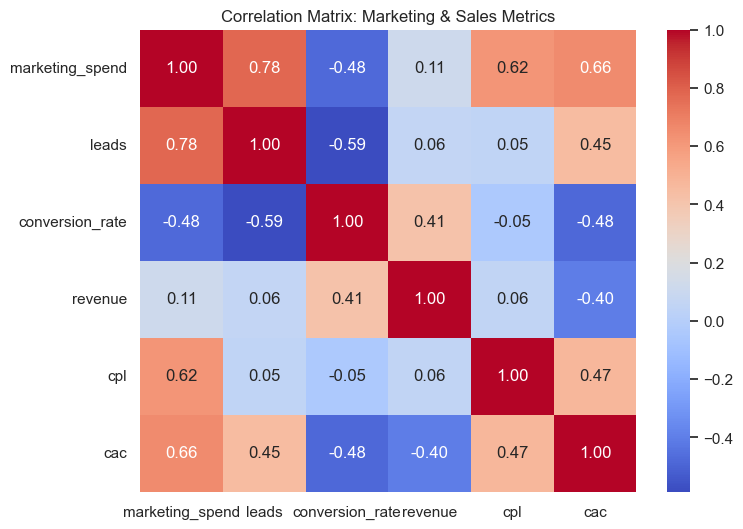

In [22]:
# Select relevant columns
corr_cols = ['marketing_spend', 'leads', 'conversion_rate', 'revenue', 'cpl', 'cac']
corr_matrix = sales_data[corr_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix: Marketing & Sales Metrics")
plt.show()

### Key Insights

- **Marketing spend vs leads:** Strong positive correlation → more spend generally generates more leads.  
- **Marketing spend vs revenue:** Positive correlation, but weaker than with leads → conversion efficiency matters.  
- **Conversion rate vs revenue:** Positive correlation → higher conversion rates directly increase revenue.  
- **CPL and CAC:** High marketing spend can increase CPL (Cost per Lead) and CAC (Customer Acquisition Cost), showing the need for efficient campaigns.